In [3]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw04.ok')

Assignment: hw04
OK, version v1.12.5



In [10]:
#Update matplotlib
!pip install matplotlib --upgrade
# Restart kernel after updating matplotlib

    100% |████████████████████████████████| 13.1MB 86kB/s  eta 0:00:01
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /srv/app/venv/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: kiwisolver>=1.0.1 in /srv/app/venv/lib/python3.6/site-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /srv/app/venv/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 20.4MB 54kB/s  eta 0:00:01
Requirement already up-to-date: python-dateutil>=2.1 in /srv/app/venv/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 583kB 1.4MB/s eta 0:00:01
Requirement already up-to-date: six in /srv/app/venv/lib/python3.6/site-packages (from cycler>=0.10->matplotlib)
  Found existing installation: numpy 1.16.0
    Uninstalling numpy-1.16.0:
      Successfully uninstalled numpy-1.16.0
  Found existing installation: matplotlib 3.1.0
    Uninstalling matplotlib-3.1.0:


In [11]:
# Update networkx
!pip install networkx --upgrade
# Restart kernel after updating networkx

  Using cached https://files.pythonhosted.org/packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl
  Found existing installation: decorator 4.1.2
    Uninstalling decorator-4.1.2:
      Successfully uninstalled decorator-4.1.2
  Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11


In [2]:
!pip install jassign

In [3]:
!pip install tqdm

In [4]:
from IPython.core.display import HTML
from datascience import *

import jassign
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import pandas as pd

plt.style.use('fivethirtyeight')

import networkx as nx
import pickle

%matplotlib inline

np.random.seed(99)

### Demography 180: Social networks

# Homework 06

## Calculating betweenness centrality from scratch

Consider the network generated by the following code.

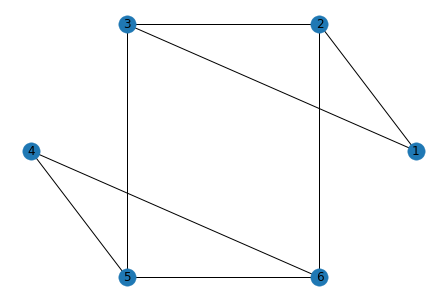

In [82]:
test_net = nx.Graph([(1,2), (1, 3), (2,3), (4,5), (4,6), (5,6), (3,5), (2,6)])
nx.draw_circular(test_net, with_labels=True)

**Question 1** Fill in the table below with the distance and the number of shortest paths between each pair of vertices. (For example, if there are three shortest paths each of length 2, write 2 (3) in the table.)

*[NOTE: You should copy the blank table below into the solution cell and then fill it in]*

| &nbsp;  | node 1 | node 2 | node 3 | node 4 | node 5 | node 6 |
|  ------ | -----  | ------ | ------ | ------ | ------ | ------ |
|  node 1 |   -    |  ? (?) |  ? (?) |  ? (?) |  ? (?) |  ? (?) |
|  node 2 |   -    |  -     |  ? (?) |  ? (?) |  ? (?) |  ? (?) |
|  node 3 |   -    |  -     |   -    |  ? (?) |  ? (?) |  ? (?) |
|  node 4 |   -    |  -     |   -    |   -    |  ? (?) |  ? (?) |
|  node 5 |   -    |  -     |   -    |   -    |   -    |  ? (?) |


<!--
BEGIN QUESTION
name: q1
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

| &nbsp;  | node 1 | node 2 | node 3 | node 4 | node 5 | node 6 |
|  ------ | -----  | ------ | ------ | ------ | ------ | ------ |
|  node 1 |   -    |  1 (1) |  1 (1) |  3 (2) |  2 (1) |  2 (1) |
|  node 2 |   -    |  -     |  1 (1) |  2 (1) |  2 (2) |  1 (1) |
|  node 3 |   -    |  -     |   -    |  2 (1) |  1 (1) |  2 (2) |
|  node 4 |   -    |  -     |   -    |   -    |  1 (1) |  1 (1) |
|  node 5 |   -    |  -     |   -    |   -    |   -    |  1 (1) |

**Question 2** Calculate the betweenness centrality for node 3 and for node 5 by hand, and fill the answers in below.

<!--
BEGIN QUESTION
name: q2
manual: False
points: 4
-->

In [6]:
bc_node3 = (0 + 1/2 + 1/1 + 0) + (0 + 1/2 + 0) + (0 + 0) + 0
bc_node5 = (0 + 0 + 1/2 + 0) + (0 + 0 + 0) + (1/1 + 1/2) + (0)

In [7]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3** Check your calculation using the `nx.betweenness_centrality` function.  
*[NB: be sure to set the normalized argument to False]*.

<!--
BEGIN QUESTION
name: q3
manual: False
points: 2
-->

In [8]:
nx.betweenness_centrality?

In [9]:
test_bc = nx.betweenness_centrality(test_net, normalized = False)
test_bc

{1: 0.0, 2: 2.0, 3: 2.0, 4: 0.0, 5: 2.0, 6: 2.0}

In [10]:
ok.grade("q3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



In [11]:
# with the function "values", you will get the dictionary array of the centrality values
nx.betweenness_centrality(test_net, normalized=False).values()

dict_values([0.0, 2.0, 2.0, 0.0, 2.0, 2.0])

## Epidemic models and centrality among US Legislators

In this homework, we'll be investigating patterns of connections on Twitter among Members of Congress (MOC). This dataset comes from the official Twitter accounts of members of Congress in the fall of 2016. We've made a few simplifications here:

* On Twitter, following is a *directed relation*. So person A can follow person B without person B necessarily following person A. Here, we've taken these directed relationships and turned them into an undirected network.
* Almost every Senator and Representative is in this dataset, but a few are missing; we'll ignore these missing people here.

The goal of the homework is to continue the analysis we looked at in lecture: we'll try to evaluate how well different metrics for centrality predict outcomes in an SIR epidemic model. The idea is that 'good' measures of centrality should be able to tell us which nodes play an important role in the spread of a disease or idea through a network.

## Exploratory analysis of the dataset

The nodes in the `official_congress_twitter` network have attributes. These attributes include:

* `official_full` - the MOC's full name
* `gender` - the MOC's gender
* `party` - the MOC's political party
* `state` - the MOC's state
* `type` - either `sen` for Senator or `rep` for Representative

Let's start by loading the dataset.

In [12]:
try:
    official_congress_twitter = pickle.load(open('../data/congress-twitter/us_congress_2016_twitter_nx2.pickle', 'rb'))
except:
    official_congress_twitter = pickle.load(open('./us_congress_2016_twitter_nx2.pickle', 'rb'))
    pass

## Exploratory analysis of the dataset

First, we'll explore the dataset, focusing on different ways to understand centrality.

In order to look more closely at the attributes of the members of Congress, we'll make use of this function:

In [14]:
def nodes_to_table(g):
    """
    Given a network `g`, return a Table that has all of the attributes of the
    nodes in the network
    """
    
    df = {}
    df['node_id'] = list(g.nodes())
    
    # assume all nodes have the same attributes
    # att_names = g.node[df['node_id'][0]].keys()
    att_names = g.nodes[df['node_id'][0]].keys()
    
    for att in att_names:
        df[att] = [node[1][att] for node in g.nodes(data=True)]
    
    df = pd.DataFrame(df)
    
    return Table.from_df(df)

The `nodes_to_table` function makes a Table that has the attributes of all of the nodes in the network it is given. We can use it like this:

In [15]:
moc_data1 = nodes_to_table(official_congress_twitter)

moc_data1

node_id,state,nickname,url,last,religion,district,party,class,birthday,official_full,phone,bioguide,start,caucus,contact_form,twitter,suffix,type,state_rank,rss_url,address,office,end,fax,gender,first,middle
2974648323,CA,nan,https://knight.house.gov,Knight,nan,25,Republican,nan,1966-12-17,Stephen Knight,202-225-1956,K000387,2015-01-06,nan,nan,2.97465e+09,nan,rep,nan,nan,1023 Longworth HOB; Washington DC 20515-0525,1023 Longworth House Office Building,2017-01-03,202-226-0683,M,Steve,nan
2253968388,AL,nan,https://byrne.house.gov,Byrne,nan,1,Republican,nan,1955-02-16,Bradley Byrne,202-225-4931,B001289,2015-01-06,nan,https://byrne.house.gov/contact/email-me,2.25397e+09,nan,rep,nan,nan,119 Cannon HOB; Washington DC 20515-0101,119 Cannon House Office Building,2017-01-03,202-225-0562,M,Bradley,nan
236511574,MI,nan,http://www.peters.senate.gov,Peters,nan,nan,Democrat,2,1958-12-01,Gary C. Peters,202-224-6221,P000595,2015-01-06,nan,nan,2.36512e+08,nan,sen,junior,nan,724 Hart Senate Office Building Washington DC 20510,724 Hart Senate Office Building,2021-01-03,nan,M,Gary,C.
161411080,CA,nan,http://napolitano.house.gov,Napolitano,Roman Catholic,32,Democrat,nan,1936-12-04,Grace F. Napolitano,202-225-5256,N000179,2015-01-06,nan,https://napolitano.house.gov/contact-me/email-me,1.61411e+08,nan,rep,nan,http://napolitano.house.gov/rss.xml,1610 Longworth HOB; Washington DC 20515-0532,1610 Longworth House Office Building,2017-01-03,202-225-0027,F,Grace,F.
402719755,NV,nan,http://amodei.house.gov,Amodei,nan,2,Republican,nan,1958-06-12,Mark E. Amodei,202-225-6155,A000369,2015-01-06,nan,https://amodei.house.gov/contact-us,4.0272e+08,nan,rep,nan,http://amodei.house.gov/common/rss//?rss=49,332 Cannon HOB; Washington DC 20515-2802,332 Cannon House Office Building,2017-01-03,202-225-5679,M,Mark,E.
442824717,MA,nan,http://neal.house.gov,Neal,Roman Catholic,1,Democrat,nan,1949-02-14,Richard E. Neal,202-225-5601,N000015,2015-01-06,nan,https://forms.house.gov/neal/webforms/Contact_Form.shtml,4.42825e+08,nan,rep,nan,http://neal.house.gov/index.php?format=feed&type=rss,341 Cannon HOB; Washington DC 20515-2101,341 Cannon House Office Building,2017-01-03,202-225-8112,M,Richard,E.
267854863,LA,nan,http://richmond.house.gov,Richmond,nan,2,Democrat,nan,1973-09-13,Cedric L. Richmond,202-225-6636,R000588,2015-01-06,nan,https://richmond.house.gov/contact-me/email-me,2.67855e+08,nan,rep,nan,http://richmond.house.gov/rss.xml,240 Cannon HOB; Washington DC 20515-1802,240 Cannon House Office Building,2017-01-03,202- 225-1988,M,Cedric,L.
21157904,NC,nan,http://www.burr.senate.gov,Burr,Methodist,nan,Republican,3,1955-11-30,Richard Burr,202-224-3154,B001135,2011-01-05,nan,http://www.burr.senate.gov/public/index.cfm?FuseAction=C ...,2.11579e+07,nan,sen,senior,http://www.burr.senate.gov/public/index.cfm?fuseaction=r ...,217 Russell Senate Office Building Washington DC 20510,217 Russell Senate Office Building,2017-01-03,202-228-2981,M,Richard,M.
163570705,MO,nan,http://cleaver.house.gov,Cleaver,nan,5,Democrat,nan,1944-10-26,Emanuel Cleaver,202-225-4535,C001061,2015-01-06,nan,https://cleaver.house.gov/contact/email-me,1.63571e+08,II,rep,nan,http://cleaver.house.gov/rss.xml,2335 Rayburn HOB; Washington DC 20515-2505,2335 Rayburn House Office Building,2017-01-03,202-225-4403,M,Emanuel,nan
2962994194,NJ,nan,https://macarthur.house.gov,MacArthur,nan,3,Republican,nan,1960-10-16,Thomas MacArthur,202-225-4765,M001193,2015-01-06,nan,nan,2.96299e+09,nan,rep,nan,nan,506 Cannon HOB; Washington DC 20515-3003,506 Cannon House Office Building,2017-01-03,202-225-0778,M,Tom,nan


There is a lot of information here, but there are three things we're going to add to this table: 

* each node's degree 
* each node's betweenness centrality 
* each node's eigenvector centrality

In order to add these three quantities to our Table of node information (`moc_data1`), we will

* compute each quantity for each node
* put the results in a table
* join the table to the `moc_data1` table

**Question 4** Fill in the code below to create a table that has several centrality measures for each node. Use the functions directly like in question 3. The function names you need are: "betweenness_centrality" and "eigenvector_centrality" in the nx package.

<!--
BEGIN QUESTION
name: q4
manual: False
points: 4
-->

In [16]:
moc_node_centrality_dat = Table().with_columns(
    'node_id', moc_data1['node_id'] ,
    'betweenness_centrality', nx.betweenness_centrality(official_congress_twitter).values() ,
    'eigenvector_centrality', nx.eigenvector_centrality(official_congress_twitter).values() ,
    'degree', [y for (x,y) in list(official_congress_twitter.degree())])

moc_node_centrality_dat

node_id,betweenness_centrality,eigenvector_centrality,degree
2974648323,1.42138e-05,0.00857233,32
2253968388,0.00343253,0.0686945,316
236511574,0.00111342,0.0367586,181
161411080,0.00066305,0.037275,181
402719755,0.000145019,0.0343923,126
442824717,1.61414e-05,0.0187438,82
267854863,0.000461037,0.0329479,152
21157904,0.00103138,0.0407424,185
163570705,0.00064934,0.038126,184
2962994194,0.00059567,0.0337996,144


In [17]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5** Now join the centrality measures onto the dataset of node attributes. 

How to use `join` function: _data1_.join(name of the column for matching, _data2_)

<!--
BEGIN QUESTION
name: q5
points: 2
manual: False
-->

In [18]:
moc_data = moc_data1.join('node_id',moc_node_centrality_dat)
print(moc_data.num_rows, moc_data.num_columns)
moc_data

519 31


node_id,state,nickname,url,last,religion,district,party,class,birthday,official_full,phone,bioguide,start,caucus,contact_form,twitter,suffix,type,state_rank,rss_url,address,office,end,fax,gender,first,middle,betweenness_centrality,eigenvector_centrality,degree
5558312,AR,nan,https://www.boozman.senate.gov/public/index.cfm/home,Boozman,nan,nan,Republican,3,1950-12-10,John Boozman,202-224-4843,B001236,2011-01-05,nan,http://www.boozman.senate.gov/public/index.cfm/e-mail-me,5.55831e+06,nan,sen,senior,http://www.boozman.senate.gov/public/index.cfm/rss/feed,141 Hart Senate Office Building Washington DC 20510,141 Hart Senate Office Building,2017-01-03,202-228-1371,M,John,nan,0.00067616,0.0387434,166
6577802,GA,nan,https://tomprice.house.gov,Price,nan,6,Republican,nan,1954-10-08,Tom Price,202-225-4501,P000591,2015-01-06,nan,https://tomprice.house.gov/contact-me,6.5778e+06,nan,rep,nan,http://tomprice.house.gov/rss.xml,100 Cannon HOB; Washington DC 20515-1006,100 Cannon House Office Building,2017-01-03,202-225-4656,M,Tom,nan,0.00297229,0.0671233,308
7429102,VA,nan,http://www.warner.senate.gov,Warner,nan,nan,Democrat,2,1954-12-15,Mark R. Warner,202-224-2023,W000805,2015-01-06,nan,http://www.warner.senate.gov/public//index.cfm?p=Contact ...,7.4291e+06,nan,sen,senior,http://www.warner.senate.gov/public/?a=rss.feed,475 Russell Senate Office Building Washington DC 20510,475 Russell Senate Office Building,2021-01-03,202-224-6295,M,Mark,nan,0.000896977,0.0328334,164
10615232,IA,Chuck,http://www.grassley.senate.gov,Grassley,Baptist,nan,Republican,3,1933-09-17,Chuck Grassley,202-224-3744,G000386,2011-01-05,nan,http://www.grassley.senate.gov/constituents/questions-an ...,1.06152e+07,nan,sen,senior,http://grassley.senate.gov/customcf/rss_feed.cfm,135 Hart Senate Office Building Washington DC 20510,135 Hart Senate Office Building,2017-01-03,202-224-6020,M,Charles,E.,0.000854794,0.0395565,171
11651202,MT,nan,https://www.daines.senate.gov,Daines,nan,nan,Republican,2,1962-08-20,Steve Daines,202-224-2651,D000618,2015-01-06,nan,nan,1.16512e+07,nan,sen,junior,nan,320 Hart Senate Office Building Washington DC 20510,320 Hart Senate Office Building,2021-01-03,202-228-1236,M,Steve,nan,0.000849762,0.0451919,195
13218102,TX,nan,https://www.cornyn.senate.gov,Cornyn,Church of Christ,nan,Republican,2,1952-02-02,John Cornyn,202-224-2934,C001056,2015-01-06,nan,http://www.cornyn.senate.gov/public/index.cfm?p=ContactForm,1.32181e+07,nan,sen,senior,http://www.cornyn.senate.gov/public/?a=rss.feed,517 Hart Senate Office Building Washington DC 20510,517 Hart Senate Office Building,2021-01-03,202-228-2856,M,John,nan,0.0023205,0.0556747,252
13491312,OH,nan,http://timryan.house.gov,Ryan,Roman Catholic,13,Democrat,nan,1973-07-16,Tim Ryan,202-225-5261,R000577,2015-01-06,nan,http://timryanforms.house.gov/contact/,1.34913e+07,nan,rep,nan,http://timryan.house.gov/rss.xml,1421 Longworth HOB; Washington DC 20515-3513,1421 Longworth House Office Building,2017-01-03,202-225-3719,M,Tim,J.,0.00285081,0.0563345,271
14135426,MN,nan,http://ellison.house.gov,Ellison,nan,5,Democrat,nan,1963-08-04,Keith Ellison,202-225-4755,E000288,2015-01-06,nan,http://ellison.house.gov/contact,1.41354e+07,nan,rep,nan,http://ellison.house.gov/index.php?format=feed&type=rss,2263 Rayburn HOB; Washington DC 20515-2305,2263 Rayburn House Office Building,2017-01-03,202-225-4886,M,Keith,Maurice,0.00081604,0.0382938,193
14275291,FL,nan,http://ros-lehtinen.house.gov,Ros-Lehtinen,Roman Catholic,27,Republican,nan,1952-07-15,Ileana Ros-Lehtinen,202-225-3931,R000435,2015-01-06,nan,https://ros-lehtinen.house.gov/contact-me/email-me,1.42753e+07,nan,rep,nan,http://ros-lehtinen.house.gov/rss.xml,2206 Rayburn HOB; Washington DC 20515-0927,2206 Rayburn House Office Building,2017-01-03,202-225-5620,F,Ileana,nan,0.00115145,0.0495,201
14845376,SC,nan,http://www.lgraham.senate.gov/public,Graham,Southern Baptist,nan,Republican,2,1955-07-09,Lindsey Graham,202-224-5972,G000359,2015-01-06,nan,http://www.lgraham.senate.gov/public/in

In [19]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6** Use `moc_data` to figure out the average degree of Republicans and Democrats. [Hint: Use select and group functions.]

<!--
BEGIN QUESTION
name: q6
manual: False
points: 4
-->

In [20]:
# Note that you have to change func_name1 and func_name2 as well
party_degree=moc_data.select(['party', 'degree']).group('party', np.mean)

party_degree

party,degree mean
Democrat,175.27
Independent,145.5
Republican,191.113


In [21]:
ok.grade("q6");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



**Question 7** Use `moc_data` to figure out the average degree of males and females in the dataset. [Hint: Use select and group functions.]

<!--
BEGIN QUESTION
name: q7
points: 4
manual: False
-->

In [22]:
# Note that you have to change func_name1 and func_name2 as well
gender_degree=moc_data.select(['gender', 'degree']).group('gender', np.mean)

gender_degree

gender,degree mean
F,197.286
M,180.679


In [23]:
ok.grade("q7");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8** Make a histogram that shows the degree distribution for moc_data table.

<!--
BEGIN QUESTION
name: q8
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

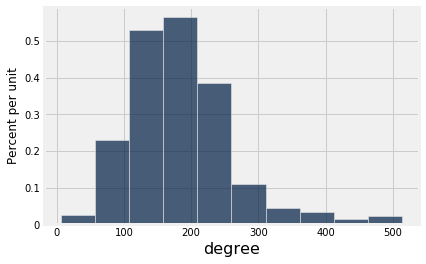

In [24]:
moc_data.hist('degree')

**Question 9** Make a histogram that shows the distribution of betweenness for moc_data table.

<!--
BEGIN QUESTION
name: q9
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

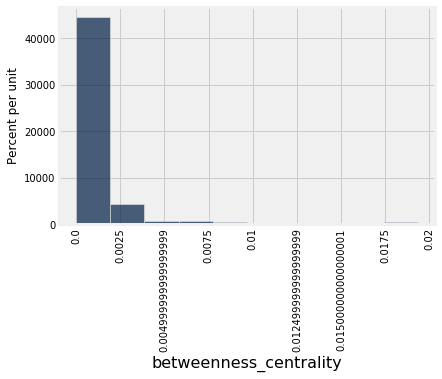

In [25]:
moc_data.hist('betweenness_centrality')

**Question 10** Make a histogram that shows the distribution of eigenvector centrality.

<!--
BEGIN QUESTION
name: q10
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

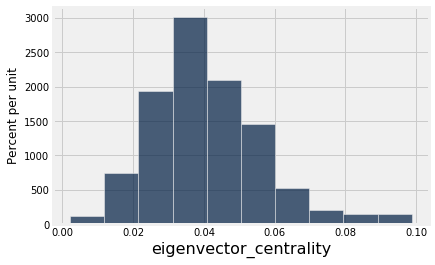

In [26]:
moc_data.hist('eigenvector_centrality')

**Question 11** Make a scatterplot that compares degree (x axis) and betweenness centrality.

<!--
BEGIN QUESTION
name: q11
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

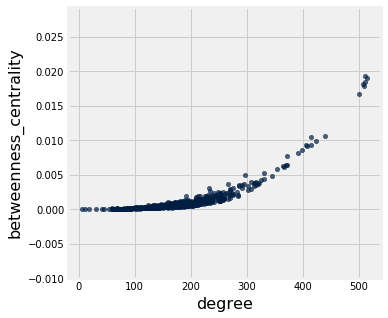

In [27]:
moc_data.scatter('degree', 'betweenness_centrality');

**Question 12** Make another scatterplot that compares degree (x axis) and eigenvector centrality.

<!--
BEGIN QUESTION
name: q12
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

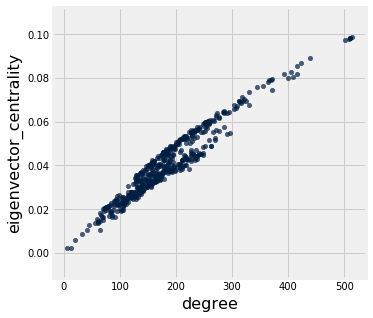

In [28]:
moc_data.scatter('degree', 'eigenvector_centrality');

**Question 13** In one or two sentences, how would you describe the relationship between these different centrality measures?

<!--
BEGIN QUESTION
name: q13
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [29]:
# I think that in general degree centrality, eigenvector centrality, and betweenness cnetrality is consist with each 
# other, and restrict each other as well. A node with fewer degree can not have that high eigenvector centrality & 
# betweenness centrality. But it doesn't means that a node with large degree will certainly have high eigenvector 
# centrality & betweenness centrality.

### Using epidemic models to understand centrality

The plots you made above show that the three different metrics of centrality (degree, eigenvector centrality, and betweenness centrality) do not all agree with each other. Our task now is to investigate which of these three quantities appears to be most effective for capturing how important a node is to the spread of an SIR epidemic on the MOC Twitter network.

One approach to this problem would be to try to analyze the SIR model mathematically: we could see if we could figure out which of the three metrics seems most closely related to the dynamics of the model. The alternative - which we will use here - is to use simulation to study this model. 

We will explore how innoculating nodes based on (1) their degree; and (2) their eigenvector centrality affects the expected size of an SIR epidemic on the MOC Twitter network. The idea is that if, for example, nodes' degrees are a good metric for centrality in an SIR epidemic, then innoculating nodes with high degree should be effective at slowing the spread of an SIR epidemic.

We'll start by bringing in several functions that we used in lab:

In [30]:
def set_status(net, ids, value):
    """
    set the value of the 'status' attribute for the nodes with the given ids
    in the given network
    """
    nx.set_node_attributes(net,  
                           dict([x for x in zip(ids, [value]*len(ids))]),
                          'status')

def get_status(net, ids):
    """
    get the value of the 'status' attributes for the nodes 
    with given ids in the given network
    """
    dat = nx.get_node_attributes(net, 'status')
    return([dat[x] for x in ids])

def count_infected_nodes(net):
    return(np.sum(np.array(list(nx.get_node_attributes(net, 'status').values())) == 'infected'))

def sim_epidemic(net, start_nodes=None, innoculated_nodes=None, beta=0.3, draw=False):
    
    # all nodes start susceptible
    set_status(net, net.nodes(), 'susceptible')

    # innoculated nodes start as recovered
    if innoculated_nodes is not None:
        set_status(net, innoculated_nodes, 'innoculated')
    else:
        innoculated_nodes = []

    eligible_to_start = [x for x in net.nodes() if x not in innoculated_nodes]        
        
    # if no start_nodes specified, pick one node at random as the seed
    if start_nodes is None:
        infected_nodes = np.random.choice(eligible_to_start, 1)
    else:
        infected_nodes = start_nodes

    
    set_status(net, infected_nodes, 'infected')

    incidence = [len(infected_nodes)]
    
    if draw:
        status_cmap = {'susceptible' : '#00FF00', 'infected' : '#FF0000', 'recovered' : '#000000', 'innoculated' : '#0000FF'}
        pos = nx.random_layout(net)
        
        #fig_nums = []

    while count_infected_nodes(net) > 0:

        if draw:
            next_fig, next_ax = plt.subplots() 
            plt.figure(nx.draw(net, 
                               pos=pos,
                               cmap=status_cmap, 
                               node_color=[status_cmap[net.node[node]['status']] for node in net]));
            #nx.draw(net, 
            #                   pos=pos,
            #                   cmap=status_cmap, 
            #                   node_color=[status_cmap[net.node[node]['status']] for node in net],
            #                   ax=next_ax)
            #fig_nums.append(plt.gcf().number)
        
        ## get neighbors of infected nodes
        neighbors = [net.neighbors(x) for x in infected_nodes]

        # see http://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python
        neighbors = [item for sublist in neighbors for item in sublist]        
        neighbors_status = np.array(get_status(net, neighbors))

        ## set infected nodes to recovered
        set_status(net, infected_nodes, 'recovered')

        ## infect susceptible neighbors with probability beta x number of infected contacts
        ## (a node with more than one infected contact will have more than one draws at being infected here)
        neighbors = [x[0] for x in zip(neighbors, neighbors_status) if x[1] == 'susceptible']
        infect_draws = np.random.random_sample(len(neighbors))
        to_infect = list(np.array(neighbors)[np.where(infect_draws < beta)])

        num_infected_this_round = len(set(to_infect))
        
        set_status(net, to_infect, 'infected')
        infected_nodes = to_infect

        ## record number infected this round (also called incidence at this time step)
        incidence.append(num_infected_this_round)
    
    return incidence

And here are a couple of additional functions that will be helpful when we investigate innoculation strategies below:

In [31]:
## example usage
## get_top_k(moc_data, 'degree', 10)

def get_top_k(data, col, k):
    node_ids = data.sort(col, descending=True).take(np.arange(0,k)).column('node_id')
    return(node_ids)

## example usage
## get_random_k(moc_data, 10)

def get_random_k(data, k):
    node_ids = data.sample(k, with_replacement=False).column('node_id')
    return(node_ids)

### Simulating an SIR epidemic on the MOC Twitter network

To start, we'll get a baseline idea of how an SIR epidemic would unfold in the MOC Twitter network. We'll be working with the following parameter values:

In [32]:
num_vaccines = 300
beta_param = .01
num_sims = 3000

**Question 14** Following the pattern from lecture, simulate `num_sims` SIR epidemics with $\beta=$`beta_param`. Then make a histogram of the distribution of the resulting number infected.  
*[NOTE: this will take about 5 minutes to run]*

<!--
BEGIN QUESTION
name: q14
points: 3
manual: False
-->

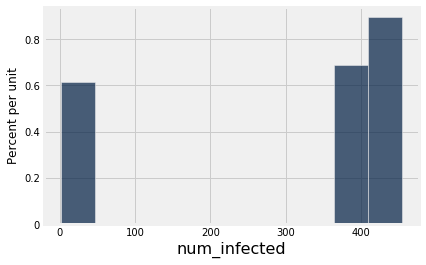

In [33]:
np.random.seed(99)
num_infected = make_array()

# Running this simulation will take about 3min...
for _ in range(num_sims):
    num_infected = np.append(num_infected, np.sum(sim_epidemic(official_congress_twitter, beta=beta_param)))
    
moc_sir_res_table = Table().with_column('num_infected', num_infected)
moc_sir_res_table.hist()

In [34]:
ok.grade("q14");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 15** Now summarize the SIR epidemic on the MOC Twitter network by calculating the mean number infected in the simulations you just ran.

<!--
BEGIN QUESTION
name: q15
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

In [35]:
moc_sir_mean_infected = np.mean(moc_sir_res_table['num_infected'])

moc_sir_mean_infected

296.7436666666667

In [36]:
ok.grade("q15");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Exploring innoculation strategies

Now that we have some understanding of how an SIR epidemic would unfold on the MOC Twitter network, we're going to try to compare different strategies for innoculating nodes in the network.
The idea is to use this approach to try and understand what characteristics make for **central** nodes in this network. We'll consider a node to be central if innoculating it reduces the expected size of the epidemic by a lot.

We're going to compare three different ways of measuring centrality: degree centrality, betweenness centrality, and eigenvector centrality. Our goal is to determine which of these three different centrality measures does the best job of telling us which nodes to innoculate in order to prevent the spread of an epidemic on this MOC Twitter network.

Note that we're using the language of disease in this assignment, as we have in lecture. But the SIR model could describe the spread of anything that is governed by simple contagion. For example, in the case of the MOC Twitter network, it might be more interesting to think about information spreading through a simple contagion-type mechanism. In that case, this analysis helps us uncover the centrality metric that best predicts which Members of Congress are most important for the flow of information across the MOC Twitter network.

### Innoculate by degree

First, we'll investigate degree centrality--that is, we'll see how much the spread of an SIR epidemic is reduced when we target nodes with high degree for vaccination.

In order to do this, let's identify the Members of Congress with the highest degree:

In [37]:
top_degree_id = get_top_k(moc_data, 'degree', num_vaccines)
top_degree_id

array([1055730738,  266133081,   17513304, 1080844782, 1206227149,
         18967498,  221793778,  213634439, 3044993235,  234053893,
         88806753, 2970462034, 1092979962,   15600527, 1080509366,
        190328374,   22509548, 1065995022,  950328072, 1051446626,
        239871673,  381152398,   15356407,   18915145,  233949261,
         19739126,   15160884, 2253968388,   18916432,  252819642,
        240760644,    6577802,   29766367, 1444015610,   17976923,
       3091316093, 2966758114,  234014087,  217543151,  246341769,
         24913074,  234822928,  110545675,  234812598, 2953713339,
        240363117,   28599820,  161743731,  244268646,  137407124,
         13491312,   22012091,   24195214, 1209417007, 2953494478,
        234469322,  292990703,  153486399,  278145569,   17800215,
         33655490,  339852137,  237312687,  211530910,   33977070,
         15394954,  248850174,  234837632, 1060487274,  248699486,
         24773493,  234022257,   23976316,   17544524, 2929491

**Question 16** Now, let's re-run our epidemic simulation, this time innoculating the nodes that have the highest degrees (which we just identified above).

<!--
BEGIN QUESTION
name: q16
points: 1
manual: False
-->

In [38]:
np.random.seed(99)
num_infected_innocdegree = make_array()

for _ in range(num_sims): # you still use the number of simulation defined before
    num_infected_innocdegree = np.append(num_infected_innocdegree, 
                                         np.sum(sim_epidemic(official_congress_twitter,
                                                             beta=beta_param,
                                                             innoculated_nodes=top_degree_id)))

num_infected_table=Table().with_column('num_infected', num_infected_innocdegree)
num_infected_table

num_infected
1
2
1
1
1
1
1
1
1
1


In [39]:
ok.grade("q16");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You can check the distribution of the numbers infected over the simulations using a histogram:

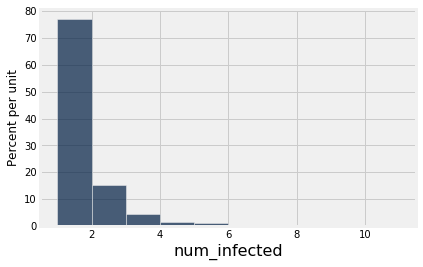

In [40]:
num_infected_table.hist()

**Question 17** Now calculate the mean number infected in the simulations you just ran.

<!--
BEGIN QUESTION
name: q17
points: 3
manual: False
-->

In [41]:
moc_target_degree_mean_infected = np.mean(num_infected_table['num_infected'])

moc_target_degree_mean_infected

1.367

In [42]:
ok.grade("q17");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Innoculate by eigenvector centrality

Next, we'll investigate eigenvector centrality--that is, we'll see how much the spread of an SIR epidemic is reduced when we target nodes with high eigenvector centrality for vaccination.

In order to do this, let's identify the Members of Congress with the highest eigenvector centrality:

In [43]:
top_ec_id = get_top_k(moc_data, 'eigenvector_centrality', num_vaccines)
top_ec_id

array([1055730738, 1080844782,  266133081,   17513304, 1206227149,
         18967498,  221793778,  213634439,  234053893, 2970462034,
         15600527, 3044993235,   88806753, 1092979962,  190328374,
       1065995022,   22509548,  950328072, 1051446626,  239871673,
       1080509366,   15356407,   15160884,  233949261,  240760644,
         18915145,  252819642,   19739126,   18916432, 2253968388,
        381152398,   17976923,    6577802,   29766367, 1444015610,
        246341769,  234822928,  234812598, 2966758114,  161743731,
        110545675,  217543151,  244268646,  240363117,  137407124,
       2953713339,  234469322,   17800215, 1209417007,   15394954,
        211530910,   16256269,  278145569,  248699486,  234837632,
        234022257,   23976316,  248850174,   34340464,   33977070,
        237862972,  237312687,  224294785,   24773493,   20015903,
         33655490,   17544524,  124224165, 2929491549,  233693291,
         24913074,  237763317, 1060487274, 1089334250,   13491

**Question 18** Now, let's re-run our epidemic simulation, this time innoculating the nodes that have the highest eigenvector centralities (which we just identified above).

<!--
BEGIN QUESTION
name: q18
points: 1
manual: False
-->

In [44]:
np.random.seed(99)
num_infected_innocec = make_array()

for _ in range(num_sims):
    num_infected_innocec = np.append(num_infected_innocec, 
                                         np.sum(sim_epidemic(official_congress_twitter, 
                                                             beta=beta_param,
                                                             innoculated_nodes=top_ec_id)))
    
num_infected_table2=Table().with_column('num_infected', num_infected_innocec)
num_infected_table2

num_infected
1
1
1
1
1
1
1
1
1
2


In [45]:
ok.grade("q18");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You can check the distribution of the numbers infected over the simulations using a histogram:

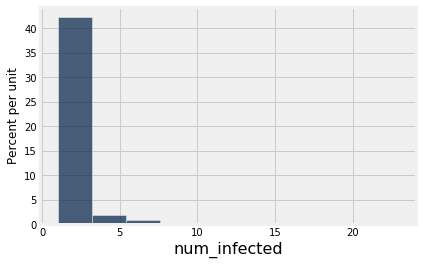

In [46]:
num_infected_table2.hist()

**Question 19** Now calculate the mean number infected in the simulations you just ran.

<!--
BEGIN QUESTION
name: q19
points: 3
manual: False
-->

In [47]:
moc_target_ec_mean_infected = np.mean(num_infected_innocec)
moc_target_ec_mean_infected

1.6266666666666667

In [48]:
ok.grade("q19");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Innoculate by betweenness centrality

Next, we'll investigate betweenness centrality--that is, we'll see how much the spread of an SIR epidemic is reduced when we target nodes with high betweenness centrality for vaccination.

In order to do this, let's identify the Members of Congress with the highest betweenness centrality:

In [49]:
top_bc_id = get_top_k(moc_data, 'betweenness_centrality', num_vaccines)
top_bc_id

array([  17513304, 1055730738,  266133081, 1206227149, 1080844782,
         18967498,  221793778, 3044993235,  213634439,  234053893,
       2970462034,   88806753, 1092979962,   15600527, 1080509366,
         22509548,  190328374,  950328072, 1065995022, 1051446626,
        381152398, 3091316093,  239871673,   15356407,   18915145,
         15160884,   29766367,   18916432,  240760644,  233949261,
       2966758114, 2953494478,   19739126,  234014087,   24913074,
       2253968388, 1444015610,  246341769,  252819642,  217543151,
       2863006655,   28599820,    6577802,   13491312,   22012091,
         17976923,   15808765,   24195214,  339852137,  237770636,
        234812598,   15764644, 1243902714,   13218102,  292990703,
        161743731, 1060487274,  153486399, 2953713339,  240363117,
       2962868158, 1209417007, 2932617195,  244268646,  234822928,
        942156122,  193872188, 1410590874,  210926192, 2962681881,
         19394188,   18909919,  110545675, 1140648348,   17544

**Question 20** Now, let's re-run our epidemic simulation, this time innoculating the nodes that have the highest betweenness centralities (which we just identified above).

<!--
BEGIN QUESTION
name: q20
points: 1
manual: False
-->

In [50]:
np.random.seed(99)
num_infected_innocbc = make_array()

for _ in range(num_sims):
    num_infected_innocbc = np.append(num_infected_innocbc, 
                                         np.sum(sim_epidemic(official_congress_twitter, 
                                                             beta=beta_param,
                                                             innoculated_nodes=top_bc_id)))
    
num_infected_table3=Table().with_column('num_infected', num_infected_innocbc)    
num_infected_table3

num_infected
1
2
1
1
1
1
1
1
1
1


In [51]:
ok.grade("q20");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You can check the distribution of the simulated numbers of people infected using a histogram:

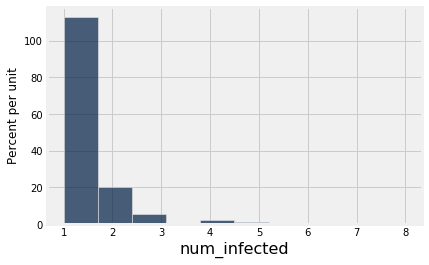

In [52]:
num_infected_table3.hist()

**Question 21** Now calculate the mean number infected in the simulations you just ran.

<!--
BEGIN QUESTION
name: q21
points: 3
manual: False
-->

In [53]:
moc_target_bc_mean_infected = np.mean(num_infected_innocbc)

moc_target_bc_mean_infected

1.3206666666666667

In [54]:
ok.grade("q21");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Innocluate at random

Finally, we'll compare the previous approaches to just vaccinating people at random.

In order to do this, we'll take a random sample of nodes in the MOC Twitter network and innoculate them.

In [55]:
random_id = get_random_k(moc_data, num_vaccines)
random_id

array([  21269970,   18773159, 1155335864,  322013313, 1058051748,
        476256944,  510516465,  234053893,  248735463,  199325935,
        242873057,  150078976,  108376246,  229966028,  234822928,
       1080844782,   51228911,  245451804,   15751083, 1155212191,
        111635980, 1055685948, 1289319271,  216503958, 1083448909,
        584012853,  237299871,   56864092, 3018670151,  249288197,
       1058345042,   29766367, 1410590874,   43910797,   22545491,
       1880674038, 1080509366,  242836537,  281540744,  231510077,
         22523087,   22012091,   57065141,   13491312, 1623308912,
       1051127714,  241207373, 2953922782,  138770045,  296361085,
         18166778,   19726613, 1058917562,   15600527,  404132211,
        234057152,  278145569,  117501995,  132201224,  221162525,
         18915145,  211420609,   88784440,   22812754,  164007407,
         26424123, 2973870195,  600463589,  960696949,   26778110,
        231108733,  237814920,   63169388,   39249305,   23970

**Question 22** Now, let's re-run our epidemic simulation, this time innoculating the nodes that we just randomly picked.

<!--
BEGIN QUESTION
name: q22
points: 1
manual: False
-->

In [56]:
np.random.seed(99)
num_infected_innocrandom = make_array()

for _ in range(num_sims):
    num_infected_innocrandom = np.append(num_infected_innocrandom, 
                                         np.sum(sim_epidemic(official_congress_twitter, 
                                                             beta=beta_param,
                                                             innoculated_nodes=random_id)))
    
num_infected_table4=Table().with_column('num_infected', num_infected_innocrandom)    
num_infected_table4

num_infected
1
1
19
11
1
1
36
39
7
25


In [57]:
ok.grade("q22");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You can check the distribution of the simulated numbers of people infected using a histogram:

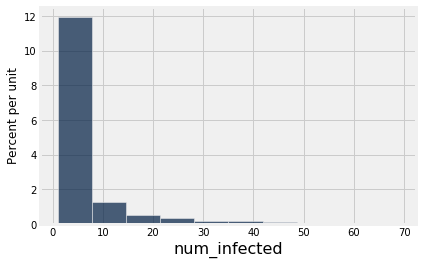

In [58]:
num_infected_table4.hist()

**Question 23** Now calculate the mean number infected in the simulations you just ran.

<!--
BEGIN QUESTION
name: q23
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

In [59]:
moc_target_random_mean_infected = np.mean(num_infected_innocrandom)

moc_target_random_mean_infected

5.440666666666667

In [60]:
ok.grade("q23");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



## Compare the different strategies

Finally, let's compare the four innoculation strategies that we just simulated.

In [61]:
innoc_results = Table().with_columns('random', num_infected_innocrandom,
                                     'eigenvector', num_infected_innocec,
                                     'betweenness', num_infected_innocbc,
                                     'degree', num_infected_innocdegree)

innoc_results

random,eigenvector,betweenness,degree
1,1,1,1
1,1,2,2
19,1,1,1
11,1,1,1
1,1,1,1
1,1,1,1
36,1,1,1
39,1,1,1
7,1,1,1
25,2,1,1


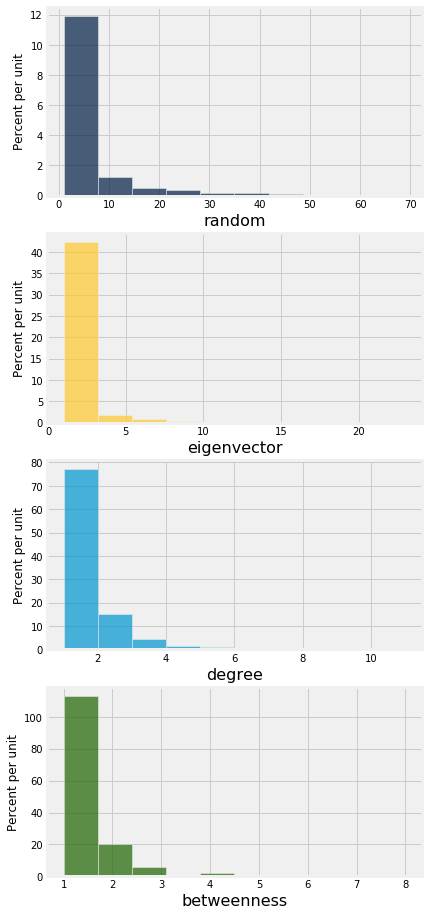

In [62]:
innoc_results.hist(['random', 'eigenvector', 'degree', 'betweenness'], overlay=False)

Average difference in # infected under eigenvector - random targeting strategy:  -3.814


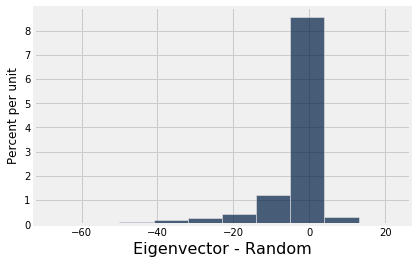

In [63]:
diff_ec_rand = innoc_results.column('eigenvector') - innoc_results.column('random')

Table().with_column('Eigenvector - Random', diff_ec_rand).hist()
print("Average difference in # infected under eigenvector - random targeting strategy: ", np.mean(diff_ec_rand))

Average difference in # infected under Degree - random targeting strategy:  -4.073666666666667


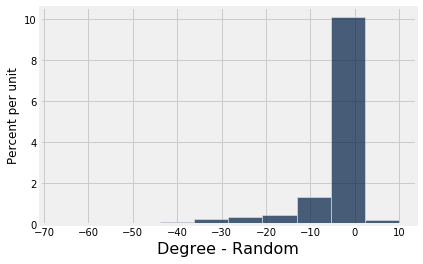

In [64]:
diff_deg_rand = innoc_results.column('degree') - innoc_results.column('random')

Table().with_column('Degree - Random', diff_deg_rand).hist()
print("Average difference in # infected under Degree - random targeting strategy: ", np.mean(diff_deg_rand))

Average difference in # infected under betweenness - random targeting strategy:  -4.12


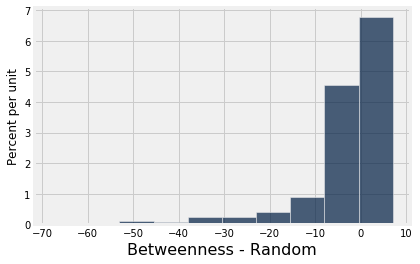

In [65]:
diff_bc_rand = innoc_results.column('betweenness') - innoc_results.column('random')

Table().with_column('Betweenness - Random', diff_bc_rand).hist()
print("Average difference in # infected under betweenness - random targeting strategy: ", np.mean(diff_bc_rand))

**Question 24** Based on these results, which innoculation strategy appears to be most effective?

<!--
BEGIN QUESTION
name: q24
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

In [ ]:
# according to the result above, I think innoculate by betweenness centrality is the best choise. Because the average 
# difference in infected under betweenness - random targeting strategy is the lowest.(-4.12). And we can also find 
# that in the histgram above 'betweenness' method has obvious infected people. 

### Examing the strategies with different budgets

Now we're going to conduct one final analysis to understand this problem. Above, we assumed that we always had a fixed number of vaccines. Next, we'll repeat the analysis we did above many different times, each time changing the number of vaccines that we have to distribute. This will help us understand whether or not our conclusions depend on the budget.

**Question 25** The loop below repeats the analysis above many times across different parameter values. Fill in the missing pieces.   
[NOTE: This will take 1-2 minutes to run]

<!--
BEGIN QUESTION
name: q25
points: 5
manual: False
-->

In [71]:
np.random.seed(99)
reps_per_param = 10

num_vaccines = np.repeat(np.array([50, 100, 150, 200, 250, 300, 350, 400]),
                         reps_per_param)

num_infected_random = make_array()
num_infected_degree = make_array()
num_infected_bc = make_array()
num_infected_ec = make_array()

for cur_num_vaccines in np.repeat(num_vaccines, reps_per_param):

        random_ids = get_random_k(moc_data, cur_num_vaccines)
        top_ec_ids = get_top_k(moc_data, "eigenvector_centrality" , cur_num_vaccines)
        top_bc_ids = get_top_k(moc_data, "betweenness_centrality", cur_num_vaccines)
        top_degree_ids = get_top_k(moc_data, "degree", cur_num_vaccines)

        num_infected_random = np.append(num_infected_random, 
                                    np.sum(sim_epidemic(official_congress_twitter, 
                                                        beta=beta_param,
                                                        innoculated_nodes=random_ids)))
        
        num_infected_ec = np.append(num_infected_ec, 
                                    np.sum(sim_epidemic(official_congress_twitter, 
                                                        beta=beta_param,
                                                        innoculated_nodes=top_ec_ids)))
        num_infected_bc = np.append(num_infected_bc, 
                                    np.sum(sim_epidemic(official_congress_twitter, 
                                                        beta=beta_param,
                                                        innoculated_nodes=top_bc_ids)))
        num_infected_degree = np.append(num_infected_degree, 
                                        np.sum(sim_epidemic(official_congress_twitter, 
                                                            beta=beta_param,
                                                            innoculated_nodes=top_degree_ids)))

sim_results = Table().with_columns('num_vaccines', np.repeat(num_vaccines, reps_per_param),
                                  'num_infected_random', num_infected_random,
                                  'num_infected_degree', num_infected_degree,
                                  'num_infected_bc', num_infected_bc,
                                  'num_infected_ec', num_infected_ec)
sim_results

num_vaccines,num_infected_random,num_infected_degree,num_infected_bc,num_infected_ec
50,1,234,288,261
50,332,2,270,260
50,348,238,1,2
50,331,284,1,189
50,365,278,3,2
50,357,2,189,297
50,312,1,1,2
50,335,274,240,279
50,360,1,242,2
50,330,1,273,2


In [72]:
ok.grade("q25");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Next, let's plot the results of the simulation:

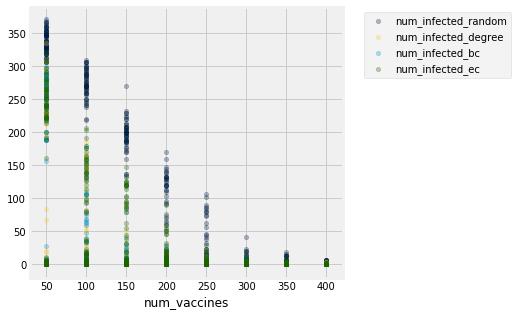

In [73]:
sim_results.scatter('num_vaccines', overlay=True, alpha=.3)

It's a little hard to tell what's going on because there's a lot of information being plotted. So we'll aggregate the results of the simulation by calculating the average outbreak size for each vaccination strategy and vaccine budget. Then we'll plot these averages.

**Question 26** Calculate the average number infected for each value of `num_vaccines` and for each innoculation strategy.

<!--
BEGIN QUESTION
name: q26
points: 2
manual: False
-->

In [75]:
sim_results_aggregate = sim_results.group('num_vaccines', np.mean)

sim_results_aggregate

num_vaccines,num_infected_random mean,num_infected_degree mean,num_infected_bc mean,num_infected_ec mean
50,249.4,131.98,123.53,138.93
100,156.98,29.22,22.93,52.49
150,96.58,4.18,4.66,28.53
200,41.78,2.59,2.92,9.31
250,15.73,1.76,1.7,2.95
300,3.93,1.35,1.43,1.84
350,2.82,1.19,1.21,1.38
400,1.56,1.14,1.07,1.13


In [76]:
ok.grade("q26");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [78]:
print('avg infected when innoculation based on:')
print('... degree: ', sim_results_aggregate.column('num_infected_degree mean').mean())
print('... betweenness centrality: ', sim_results_aggregate.column('num_infected_bc mean').mean())
print('... eigenvector centrality: ', sim_results_aggregate.column('num_infected_ec mean').mean())
print('... random:', sim_results_aggregate.column('num_infected_random mean').mean())

avg infected when innoculation based on:
... degree:  21.67625
... betweenness centrality:  19.931250000000002
... eigenvector centrality:  29.570000000000004
... random: 71.0975


Finally, let's plot the aggregate results; we'll see a clearer pattern here:

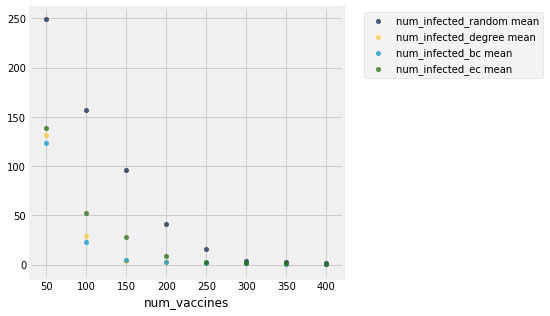

In [77]:
sim_results_aggregate.scatter('num_vaccines', overlay=True)

**Question 27** Based on these results, which innoculation strategy appears to be most effective across the range of vaccine budgets we investigated? Does this change your conclusion from before?

<!--
BEGIN QUESTION
name: q27
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

In [ ]:
# Based on these results, It confirms me about my former result - innoculate by betweenness centrality is the most
# effective way accross the range of vaccine budgets we investigated.

# Because we can easily find that whatever the number of vaccines is, number of infected people using "innoculate by
# betweenness centrality" is the smallest in the test.

# SUBMIT YOUR ASSIGNMENT

In [79]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t

The due time for this homework is Tuesday Aug 13th, at 11:59 pm.

In [83]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw04.ipynb', 'hw04.pdf')
ok.submit()

Generating PDF...
Saved hw04.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw04.ipynb'.
Submit... 100% complete
Submission successful for user: ziqiyuan123@berkeley.edu
URL: https://okpy.org/cal/demog180/su19/hw04/submissions/YW8ZpK

